# [spatialLIBD: info_table](https://research.libd.org/spatialLIBD/)

In [1]:
import sys
from pathlib import Path
p_root = Path('~/link/csMAHN_Spatial').expanduser()
sys.path.append(str(p_root)) if not str(p_root) in sys.path else None

In [2]:
from init import *

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-30 10:19:55.430778: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---------------------------------------------------------
[names import from utils.general]
----------------------------------------------------------
  Block Path json module_exists
  mpl np pd plt
  rng show_dict_key sns subset_dict


In [3]:
df = pd.concat([ut.df.iterdir(_, path_match_filter='*web_summary.html')
                .assign(id=_.name) for _ in
                ut.df.iterdir(Path('HumanPilot/10X/'),
                              select='d', path_match='*15*')['path']])

df['type'] = df['name'].map({'scalefactors_json.json': 'scalefactors',
                             'tissue_hires_image.png': 'image_hires',
                             'tissue_lowres_image.png': 'image_lowres',
                             'tissue_positions_list.txt': 'positions',
                             'metrics_summary_csv.csv': 'metrics_summary'})

with Block('h5'):
    _temp = ut.df.iterdir(Path('h5'), path_match='*h5')
    _temp['type'] = 'matrix'
    _temp['id'] = _temp['name'].str.extract('^(\\d+)_', expand=False)
    df = pd.concat([df, _temp
                    ], axis=0, ignore_index=True)
with Block('obs'):
    _temp = ut.df.iterdir(
        Path('HumanPilot/outputs/SpatialDE_clustering'),
        path_match='*csv')
    _temp['type'] = 'obs'
    _temp['id'] = _temp['name'].str.extract(
        '^cluster_labels_(\\d+)\\.csv', expand=False)
    df = pd.concat([df, _temp], axis=0, ignore_index=True)

df = df.pivot(index='id', columns='type', values='path')
df['id'] = df.index
ut.df.show(df)

type,image_hires,image_lowres,matrix,metrics_summary,obs,positions,scalefactors,id
id,,,,,,,,
151507,HumanPilot/10X/151507/tissue_hires_image.png,HumanPilot/10X/151507/tissue_lowres_image.png,h5/151507_filtered_feature_bc_matrix.h5,HumanPilot/10X/151507/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151507/tissue_positions_list.txt,HumanPilot/10X/151507/scalefactors_json.json,151507
151508,HumanPilot/10X/151508/tissue_hires_image.png,HumanPilot/10X/151508/tissue_lowres_image.png,h5/151508_filtered_feature_bc_matrix.h5,HumanPilot/10X/151508/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151508/tissue_positions_list.txt,HumanPilot/10X/151508/scalefactors_json.json,151508


(12, 8)

In [4]:
df

type,image_hires,image_lowres,matrix,metrics_summary,obs,positions,scalefactors,id
id,,,,,,,,
151507,HumanPilot/10X/151507/tissue_hires_image.png,HumanPilot/10X/151507/tissue_lowres_image.png,h5/151507_filtered_feature_bc_matrix.h5,HumanPilot/10X/151507/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151507/tissue_positions_list.txt,HumanPilot/10X/151507/scalefactors_json.json,151507
151508,HumanPilot/10X/151508/tissue_hires_image.png,HumanPilot/10X/151508/tissue_lowres_image.png,h5/151508_filtered_feature_bc_matrix.h5,HumanPilot/10X/151508/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151508/tissue_positions_list.txt,HumanPilot/10X/151508/scalefactors_json.json,151508
151509,HumanPilot/10X/151509/tissue_hires_image.png,HumanPilot/10X/151509/tissue_lowres_image.png,h5/151509_filtered_feature_bc_matrix.h5,HumanPilot/10X/151509/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151509/tissue_positions_list.txt,HumanPilot/10X/151509/scalefactors_json.json,151509
151510,HumanPilot/10X/151510/tissue_hires_image.png,HumanPilot/10X/151510/tissue_lowres_image.png,h5/151510_filtered_feature_bc_matrix.h5,HumanPilot/10X/151510/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151510/tissue_positions_list.txt,HumanPilot/10X/151510/scalefactors_json.json,151510
151669,HumanPilot/10X/151669/tissue_hires_image.png,HumanPilot/10X/151669/tissue_lowres_image.png,h5/151669_filtered_feature_bc_matrix.h5,HumanPilot/10X/151669/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151669/tissue_positions_list.txt,HumanPilot/10X/151669/scalefactors_json.json,151669
151670,HumanPilot/10X/151670/tissue_hires_image.png,HumanPilot/10X/151670/tissue_lowres_image.png,h5/151670_filtered_feature_bc_matrix.h5,HumanPilot/10X/151670/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151670/tissue_positions_list.txt,HumanPilot/10X/151670/scalefactors_json.json,151670
151671,HumanPilot/10X/151671/tissue_hires_image.png,HumanPilot/10X/151671/tissue_lowres_image.png,h5/151671_filtered_feature_bc_matrix.h5,HumanPilot/10X/151671/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151671/tissue_positions_list.txt,HumanPilot/10X/151671/scalefactors_json.json,151671
151672,HumanPilot/10X/151672/tissue_hires_image.png,HumanPilot/10X/151672/tissue_lowres_image.png,h5/151672_filtered_feature_bc_matrix.h5,HumanPilot/10X/151672/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151672/tissue_positions_list.txt,HumanPilot/10X/151672/scalefactors_json.json,151672
151673,HumanPilot/10X/151673/tissue_hires_image.png,HumanPilot/10X/151673/tissue_lowres_image.png,h5/151673_filtered_feature_bc_matrix.h5,HumanPilot/10X/151673/metrics_summary_csv.csv,HumanPilot/outputs/SpatialDE_clustering/cluste...,HumanPilot/10X/151673/tissue_positions_list.txt,HumanPilot/10X/151673/scalefactors_json.json,151673


In [5]:
for i, row in df.iterrows():
    pass
    # print(row['id'].ljust(25, '-'))
    # ut.df.show(
    #     pd.read_csv(
    #         row['positions'],
    #         header=None,
    #         index_col=0,
    #         names='_,index_x,index_y,pixel_x,pixel_y'.split(',')) .drop(
    #         columns=['_']))
row
row = df.loc['151674', :]
row

type
image_hires             HumanPilot/10X/151674/tissue_hires_image.png
image_lowres           HumanPilot/10X/151674/tissue_lowres_image.png
matrix                       h5/151674_filtered_feature_bc_matrix.h5
metrics_summary        HumanPilot/10X/151674/metrics_summary_csv.csv
obs                HumanPilot/outputs/SpatialDE_clustering/cluste...
positions            HumanPilot/10X/151674/tissue_positions_list.txt
scalefactors            HumanPilot/10X/151674/scalefactors_json.json
id                                                            151674
Name: 151674, dtype: object

# 各个样本独立导出

In [6]:
# for i, row in df.iterrows():
#     print(row['id'].ljust(25, '-'))
    
#     p_out = p_cache.joinpath('hs_DLPFC_{}'.format(row['id']))
#     if p_out.exists():
#         continue

#     adata = sc.read_10x_h5(row['matrix'])
#     adata.var_names_make_unique()
    
#     adata.obs.index = adata.obs.index.to_series()\
#         .apply(lambda x: '{}_{}'.format(row['id'], x))
#     adata.obs = adata.obs.loc[:, []].join(pd.read_csv(row['obs'], index_col=0)
#                                           ).loc[:, ['ground_truth']]
    
#     _temp = pd.read_csv(row['positions'], header=None, index_col=0,
#                         names='_,index_x,index_y,pixel_x,pixel_y'.split(','))\
#         .drop(columns=['_'])
#     _temp.index = _temp.index.to_series().apply(
#         lambda x: '{}_{}'.format(row['id'], x))
#     adata.obs = adata.obs.join(_temp)
#     adata = ut.sc.load_obsm_spatial(adata)
#     adata = ut.sc.load_uns_spatial(adata,key_uns_spatial=row['id'],
#         path_imgs={k.replace('image_',''): v for k,
#             v in row.items() if k.startswith('image_')},
#         path_jsons={
#             'scalefactors': row['scalefactors']})
    
#     ut.sc.load_spatial_images(adata,key_images='lowres')
    
#     for key_uns_spatial,key_img in ut.sc.yield_key_uns_spatial_and_key_img(adata):
#         adata = ut.sc.reverse_spatial_img(adata,key_uns_spatial=key_uns_spatial,
#             key_images=key_img,reverse_h=False,reverse_v=False,transpose=True)

#     ut.sc.save_as_mtx(adata,p_out)

# print('\n[finish]\n'.center(100,'-'))

# 将样本合并后再导出

In [7]:
dict_adatas = {}

for i, row in df.iterrows():
    print(row['id'].ljust(25, '-'))
    adata = sc.read_10x_h5(row['matrix'])
    adata.var_names_make_unique()
    
    adata.obs.index = adata.obs.index.to_series()\
        .apply(lambda x: '{}_{}'.format(row['id'], x))
    adata.obs['_batch'] = row['id']
    adata.obs = adata.obs.loc[:, ['_batch']]\
        .join(pd.read_csv(row['obs'], index_col=0))\
        .loc[:,'_batch,ground_truth'.split(',')]
    
    _temp = pd.read_csv(row['positions'], header=None, index_col=0,
                        names='_,index_x,index_y,pixel_x,pixel_y'.split(','))\
        .drop(columns=['_'])
    _temp.index = _temp.index.to_series().apply(
        lambda x: '{}_{}'.format(row['id'], x))
    adata.obs = adata.obs.join(_temp)
    ## sc.concat 仅保留.var .obs 和obsm, 存于uns中的信息都丢失了
    ## 将先数据存于.obs中,待合并后再就行处理
    # adata = ut.sc.load_obsm_spatial(adata)
    # adata = ut.sc.load_uns_spatial(adata,key_uns_spatial=row['id'],
    #     path_imgs={k.replace('image_',''): v for k,
    #         v in row.items() if k.startswith('image_')},
    #     path_jsons={
    #         'scalefactors': row['scalefactors']})
    
    # ut.sc.load_spatial_images(adata,key_images='lowres')
    
    # for key_uns_spatial,key_img in ut.sc.yield_key_uns_spatial_and_key_img(adata):
    #     adata = ut.sc.reverse_spatial_img(adata,key_uns_spatial=key_uns_spatial,
    #         key_images=key_img,reverse_h=False,reverse_v=False,transpose=True)

    # ut.sc.save_as_mtx(adata,p_out)
    dict_adatas.update({row['id'] : adata})
    del adata

print('\n[finish]\n'.center(100,'-'))

151507-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151508-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151509-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151510-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151669-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151670-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151671-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151672-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151673-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151674-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151675-------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


151676-------------------
---------------------------------------------
[finish]
---------------------------------------------


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
adata = sc.concat(dict_adatas)
adata = ut.sc.load_obsm_spatial(adata)
for i, row in df.iterrows():
    adata = ut.sc.load_uns_spatial(adata,key_uns_spatial=row['id'],
        path_imgs={k.replace('image_',''): v for k,
            v in row.items() if k.startswith('image_')},
        path_jsons={'scalefactors': row['scalefactors']})
ut.sc.show(adata,show_var=True)
# ut.sc.show_spatial(adata)

AnnData object with n_obs × n_vars = 47681 × 33538
    obs: '_batch', 'ground_truth', 'index_x', 'index_y', 'pixel_x', 'pixel_y'
    uns: 'spatial'
    obsm: 'spatial'

[check unique]
	obs.index	var.index
	True		True


,_batch,ground_truth,index_x,index_y,pixel_x,pixel_y
151507_AAACAACGAATAGTTC-1,151507,Layer_1,0,16,2514,3276
151507_AAACAAGTATCTCCCA-1,151507,Layer_3,50,102,8520,9178


(47681, 6)

""
MIR1302-2HG
FAM138A


(33538, 0)

In [9]:
ut.sc.show(adata)
ut.sc.get_key_uns_spatial(adata)

AnnData object with n_obs × n_vars = 47681 × 33538
    obs: '_batch', 'ground_truth', 'index_x', 'index_y', 'pixel_x', 'pixel_y'
    uns: 'spatial'
    obsm: 'spatial'

[check unique]
	obs.index	var.index
	True		True


,_batch,ground_truth,index_x,index_y,pixel_x,pixel_y
151507_AAACAACGAATAGTTC-1,151507,Layer_1,0,16,2514,3276
151507_AAACAAGTATCTCCCA-1,151507,Layer_3,50,102,8520,9178


(47681, 6)

['151507',
 '151508',
 '151509',
 '151510',
 '151669',
 '151670',
 '151671',
 '151672',
 '151673',
 '151674',
 '151675',
 '151676']

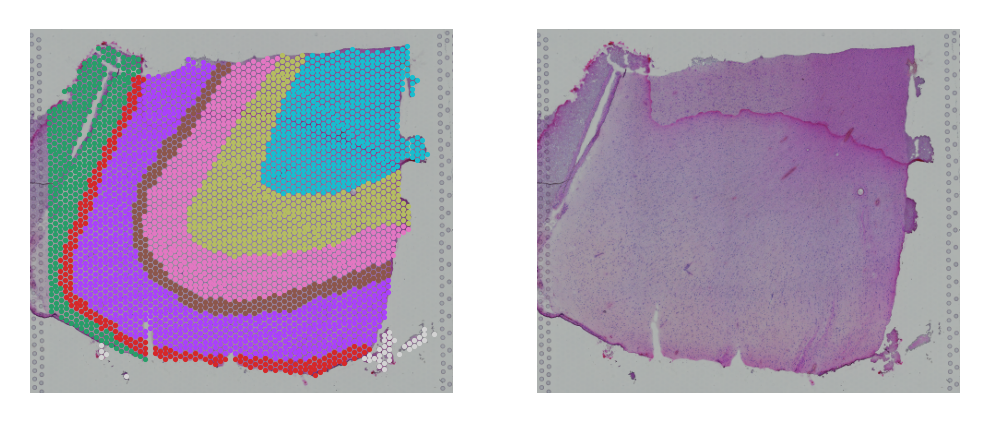

In [10]:
with Block('',context={'size':1,
                      'key_img':'lowres',
                      'sample':'151674'}) as context:
    ut.sc.load_spatial_images(adata,
                              key_uns_spatial=context.sample,
                              key_images=context.key_img)
    
    adata = ut.sc.reverse_spatial_img(adata,key_uns_spatial=context.sample,
            key_images=context.key_img,reverse_h=False,reverse_v=False,transpose=True)
    fig, axs = pl.figure.subplots_get_fig_axs(1, 2)
    ax = axs[0]
    ut.sc.pl.spatial(ut.sc.subset_adata(adata,'_batch',context.sample),
            key='ground_truth',size=context.size,
            key_uns_spatial=context.sample,
            key_img=context.key_img,
            ax=ax)
    ax = axs[1]
    ut.sc.pl.spatial(ut.sc.subset_adata(adata,'_batch',context.sample),
            key='ground_truth',size=context.size,
            key_uns_spatial=context.sample,
            key_img=context.key_img,
            ax=ax, draw_scatter=False)

In [11]:
ut.sc.save_as_mtx(adata,p_cache.joinpath('Brain_hs_DLPFC'))

frist 10 matrix nonzero elements:
 [[1 1 1 1 2 1 1 1 1 2]]
[save] spatial info
[out] /public/workspace/licanchengup/link/csMAHN_Spatial/dataset/cache/Brain_hs_DLPFC


# check 151674

In [12]:
row = df.loc['151674', :]
adata = ut.sc.load_adata(p_cache.joinpath('hs_DLPFC_{}'.format(row['id'])))
adata = ut.sc.load_spatial_images(adata,key_images='lowres')
for key_uns_spatial,key_img in ut.sc.yield_key_uns_spatial_and_key_img(adata):
    adata = ut.sc.reverse_spatial_img(adata,key_uns_spatial=key_uns_spatial,
        key_images=key_img,reverse_h=False,reverse_v=False,transpose=True)

ut.sc.show_spatial(adata)

Exception: [can not load adata] /public/workspace/licanchengup/link/csMAHN_Spatial/dataset/cache/hs_DLPFC_151674

In [ ]:
with Block('',context={'size':1,
                      'key_img':'lowres'}) as context:
    fig, axs = pl.figure.subplots_get_fig_axs(1, 2)
    ax = axs[0]
    ut.sc.pl.spatial(adata, key='ground_truth',size=context.size,
            key_uns_spatial='spatial',
            key_img=context.key_img,
            ax=ax)
    ax = axs[1]
    ut.sc.pl.spatial(adata, key='ground_truth',size=context.size,
            key_uns_spatial='spatial',
            key_img=context.key_img,
            ax=ax, draw_scatter=False)